In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

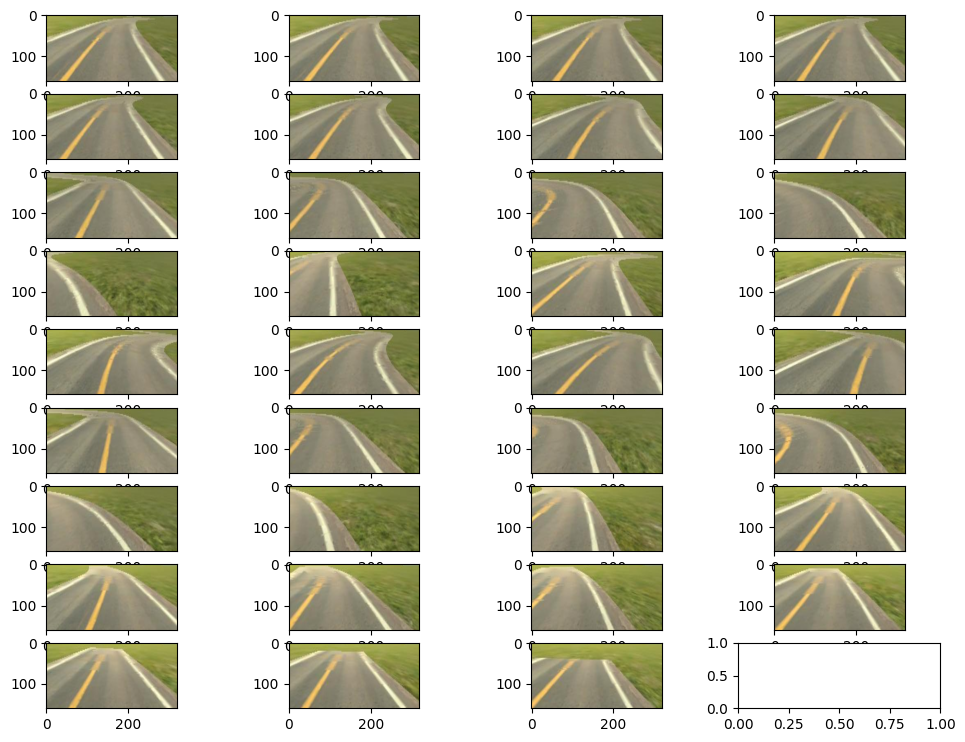

In [2]:
import random
from natsort import natsorted
import os

os.chdir("../")
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from utils.dataset_utils import preprocess



simulation_name = "simulations/24-01-30-12-39-XAI-seed=14-num-episodes=20-agent=supervised-num-control-nodes=8-max-angle=70/episode8"
image_names_list = natsorted(glob(os.path.join( simulation_name, '*.jpg')))
image_list = list(map(Image.open, natsorted(glob(os.path.join(simulation_name, '*.jpg')))))
index_step = 5

"""
plt.subplot(1,2,1)
plt.imshow(image_list[0])
plt.subplot(1,2,2)
plt.imshow(preprocess(np.asarray(image_list[0])))
"""
images = image_list[::index_step]
processed_image = []

ncol = 4
nrow = 9
f, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12, 9))

for i,image in enumerate(image_list[::index_step]):

    img = preprocess(np.asarray(image), if_yuv = False)
    processed_image.append(img)
    
    ax[int((i-i%ncol)/ncol), i%ncol].imshow(img)  #

In [3]:
import cv2
from PIL import Image


def color_mask(img, color):
    # print(img[159:,25:60,])
    #print(img[0])
    img_hsv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2HSV)

    if color in ["yellow", "y"]:
        lb = np.array([10,100,100])
        ub= np.array([25,255,255])
        mask = cv2.inRange(img_hsv, lb, ub)
        mask_blur = cv2.medianBlur(mask,5)
        
    elif color in ["white", "w"]:
        lb = np.array([0,0,200])
        ub= np.array([180,50,255])
        mask = cv2.inRange(img_hsv, lb, ub)
        mask_blur = cv2.medianBlur(mask,5)
        
    elif color in ["green", "g"]:
        lb = np.array([26,50,50])
        ub= np.array([38,200,175])
        mask = cv2.inRange(img_hsv, lb, ub)
        mask_blur = cv2.medianBlur(mask,15)

    #result = cv2.bitwise_and(img, img_hsv, mask=mask)
    return mask_blur



In [4]:
f, ax = plt.subplots(nrows=nrow*2, ncols=ncol, figsize=(12, 9))
for i,img in enumerate(processed_image):
    ax[2*int((i-i%ncol)/ncol), i%ncol].imshow(img)  #
    green_mask = color_mask(img, color = "g")
    ax[2*int((i-i%ncol)/ncol)+1, i%ncol].imshow(green_mask) 

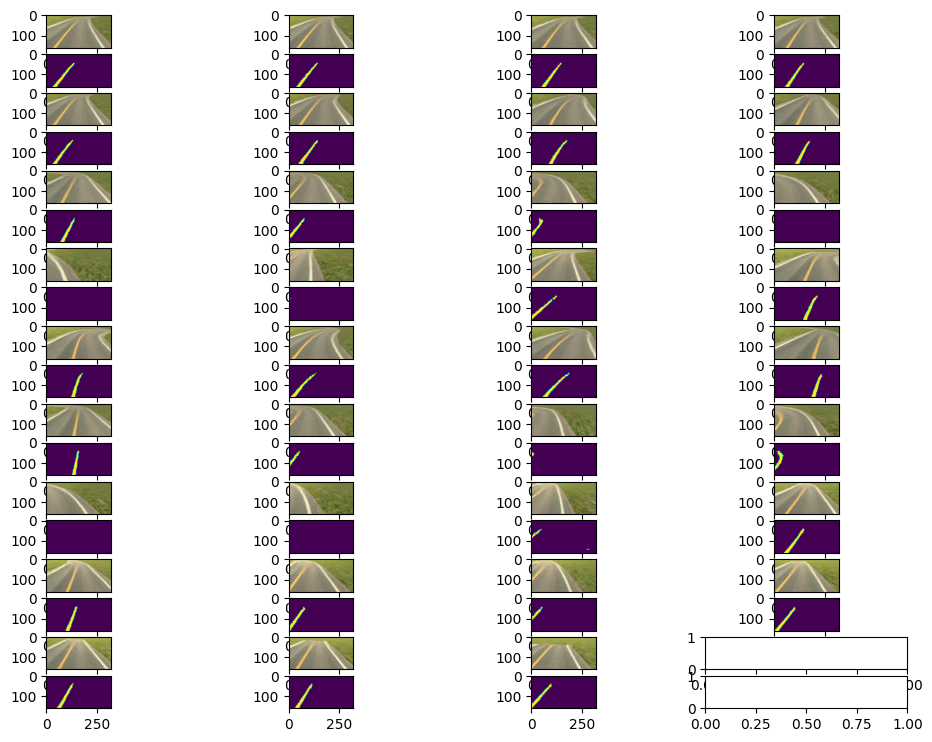

In [5]:
f, ax = plt.subplots(nrows=nrow*2, ncols=ncol, figsize=(12, 9))
for i,img in enumerate(processed_image):
    ax[2*int((i-i%ncol)/ncol), i%ncol].imshow(img)  #
    yellow_mask = color_mask(img, color = "y")
    ax[2*int((i-i%ncol)/ncol)+1, i%ncol].imshow(yellow_mask) 
    #print(np.unique(yellow_mask))

In [6]:
f, ax = plt.subplots(nrows=nrow*2, ncols=ncol, figsize=(12, 9))
for i,img in enumerate(processed_image):
    ax[2*int((i-i%ncol)/ncol), i%ncol].imshow(img)  #
    white_mask = color_mask(img, color = "w")
    ax[2*int((i-i%ncol)/ncol)+1, i%ncol].imshow(white_mask) 

[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 280.5]
[  0.  102.  178.5 280.5]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 255.  280.5]
[  0.  102.  178.5 280.5]
[  0.  102.  178.5]
[  0.  102.  178.5 255.  357. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255.  357. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]
[  0.  102.  178.5 255. ]


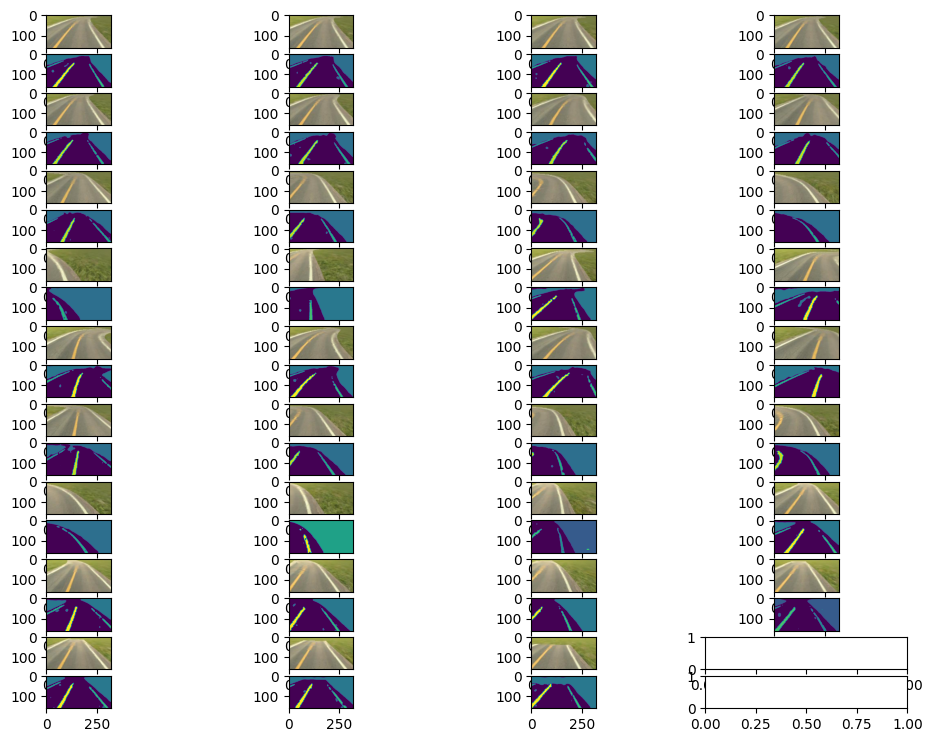

In [7]:
f, ax = plt.subplots(nrows=nrow*2, ncols=ncol, figsize=(12, 9))
for i,img in enumerate(processed_image):
    ax[2*int((i-i%ncol)/ncol), i%ncol].imshow(img)  #
    yellow_mask = color_mask(img, color = "y")
    white_mask = color_mask(img, color = "w")
    green_mask = color_mask(img, color = "g")

    mix_mask = 0.7*white_mask+yellow_mask +0.4*green_mask
    ax[2*int((i-i%ncol)/ncol)+1, i%ncol].imshow(mix_mask) 
    print(np.unique(mix_mask))

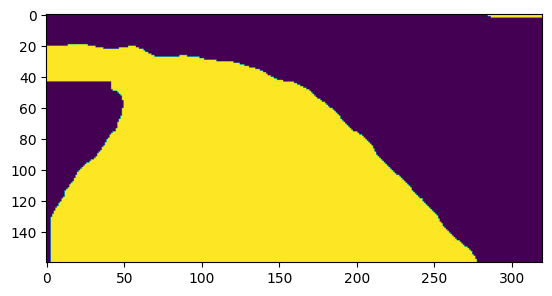

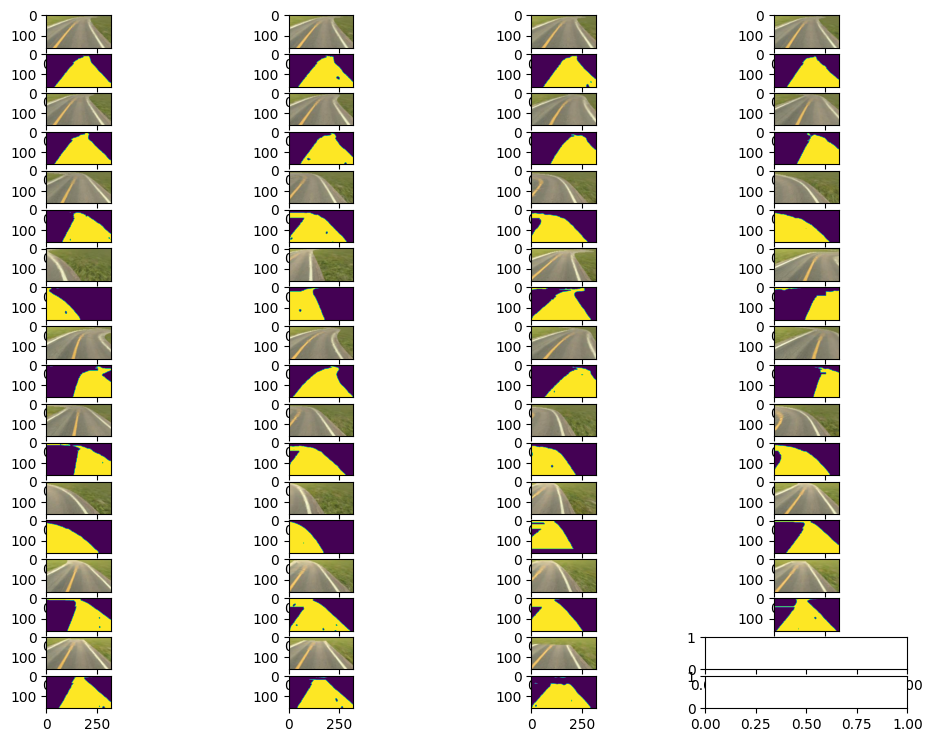

In [8]:
def find_lane(yellow_mask, green_mask):
    labels = ["grass_left", "lane_left",  "lane_right", "grass_right"]
    road_mask = 255 - green_mask
    right_lane_mask = road_mask.copy()
    
    #if side in ["r", "right"]:
    #    pass
    #elif side in ["l", "left"]:

    last = last_last = None
    
    for row_id in range(yellow_mask.shape[0]):
        
        r_row = road_mask[row_id, :]
        y_row = yellow_mask[row_id, :]
        
        mid_line_indices = np.nonzero(y_row)[0]
        
        if len(mid_line_indices) == 0  and last_last is None:
            # print(f"No yellow line at row {row_id}")
            road_indices = np.nonzero(r_row)[0]
            if len(road_indices) == 0:
                middle_indice = -1
            elif r_row[-1] > 0 and r_row[-2] > 0:
                middle_indice = 256

            elif r_row[0] > 0 and r_row[1] > 0:
                # yellow line is one the left 
                middle_indice = -1
            else:
                
                middle_indice = road_indices[len(road_indices)//2]
        else:
            if len(mid_line_indices) == 0 and last_last is not None: 
                middle_indice = 2*last - last_last
            else:
                middle_indice = mid_line_indices[len(mid_line_indices)//2]      

            
            last_last = last if last is not None else last_last
            last = middle_indice 
            
        # print(middle_indice)

        for col_id in np.nonzero(r_row)[0]:
            #if middle_indice > 0:
                if col_id < middle_indice:
                    right_lane_mask[row_id, col_id] = 0

                    
    return road_mask, right_lane_mask

img = processed_image[10]
yellow_mask = color_mask(img, color = "y")
white_mask = color_mask(img, color = "w")
green_mask = color_mask(img, color = "g")
#print(yellow_mask.shape)
# mix_mask = 0.7*white_mask+yellow_mask +0.4*green_mask
road_mask, right_lane_mask = find_lane(yellow_mask, green_mask)


plt.imshow(right_lane_mask)


f, ax = plt.subplots(nrows=nrow*2, ncols=ncol, figsize=(12, 9))
for i,img in enumerate(processed_image):
    ax[2*int((i-i%ncol)/ncol), i%ncol].imshow(img)  #
    yellow_mask = color_mask(img, color = "y")
    white_mask = color_mask(img, color = "w")
    green_mask = color_mask(img, color = "g")
    #print(yellow_mask.shape)
    # mix_mask = 0.7*white_mask+yellow_mask +0.4*green_mask
    road_mask, right_lane_mask = find_lane(yellow_mask, green_mask)
    ax[2*int((i-i%ncol)/ncol)+1, i%ncol].imshow(right_lane_mask) 
    #print(np.unique(mix_mask))

